# Data Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV and the table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset:

In [368]:
#importing dataset from github

df=pd.read_csv('https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


We pulled the Avacado dataset from the github through the link. 

1) The first Column is unnamed. So, we will remane it for better understanding in next step.

2) Out of 14 columns - I can see two duplicate columns which is TotalVolume and TotalBag because it is represent the overall total of other columns.

In [369]:
df=df.rename(columns={'Unnamed: 0':'Serial No','4046':'PLU 4046','4225':'PLU 4225','4770':'PLU 4770','type':'Type','year':'Year','region':'Region'}) 
df.head()

,Serial No,Date,AveragePrice,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


I have renamed the first column of unnamed as Serial No and Other last three column - I have changed the first letter as Capital. It will help me to understand Easily.

In [370]:
df=df[['Serial No','Date','Total Volume','PLU 4046','PLU 4225','PLU 4770','Total Bags','Small Bags','Large Bags','XLarge Bags','Type','Year','Region','AveragePrice']]
df.head()

,Serial No,Date,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,AveragePrice
0,0.0,27-12-2015,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,1.33
1,1.0,20-12-2015,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,1.35
2,2.0,13-12-2015,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,0.93
3,3.0,06-12-2015,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,1.08
4,4.0,29-11-2015,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,1.28


We have re-arraged the dataframe becasue AveragePrice is the target column. Hence we moved to last for better understanding.

In [371]:
df.dtypes

Serial No       float64
Date             object
Total Volume    float64
PLU 4046        float64
PLU 4225        float64
PLU 4770        float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
Type             object
Year            float64
Region           object
AveragePrice    float64
dtype: object

We have a 14 columns in the dataset which are in object,integer & float type. Also, we will encode the string value in further step.

In [372]:
df.shape

(16468, 14)

We have a 16,468 rows and 14 columns in the dataset.

# Checking the Null Value:

In [373]:
df.isnull().sum()

Serial No       14951
Date            14951
Total Volume    14951
PLU 4046        14951
PLU 4225        14951
PLU 4770        14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
Type            14951
Year            14951
Region          14951
AveragePrice    14951
dtype: int64

We have a null value in the dataset around 14,951 rows for all the columns. I have decided based on the above info.

Also, there is no use to fill the nan value for this row because all the columns having the null value. If we fill the null value then it will affect the performance of model.

So, I have decided to drop the null value rows in the next step.

In [374]:
df=df.dropna()
df.head()

,Serial No,Date,Total Volume,PLU 4046,PLU 4225,PLU 4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,AveragePrice
0,0.0,27-12-2015,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,1.33
1,1.0,20-12-2015,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,1.35
2,2.0,13-12-2015,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,0.93
3,3.0,06-12-2015,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,1.08
4,4.0,29-11-2015,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,1.28


In [375]:
df.shape

(1517, 14)

After dropig the unwanted rows then we have a 1517 rows and 14 columns in the dataset.

checking the data type again from the dataset

In [376]:
df.isnull().sum()

Serial No       0
Date            0
Total Volume    0
PLU 4046        0
PLU 4225        0
PLU 4770        0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
Type            0
Year            0
Region          0
AveragePrice    0
dtype: int64

Based on the above info - We don't have a null value in the dataset. However, we can visualization this data through heatmap.

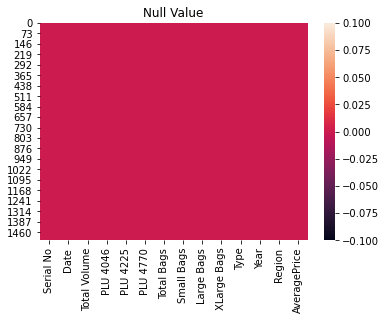

In [377]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

Just I ensure through visualization - We don't gave a null value in the dataset.

# Droping the Duplicate Columns

In [378]:
df=df.drop(["Serial No","Total Bags","Total Volume","Total Bags","Date","Type"],axis=1)
df.head()

,PLU 4046,PLU 4225,PLU 4770,Small Bags,Large Bags,XLarge Bags,Year,Region,AveragePrice
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015.0,Albany,1.33
1,674.28,44638.81,58.33,9408.07,97.49,0.0,2015.0,Albany,1.35
2,794.70,109149.67,130.50,8042.21,103.14,0.0,2015.0,Albany,0.93
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015.0,Albany,1.08
4,941.48,43838.39,75.78,5986.26,197.69,0.0,2015.0,Albany,1.28


I have dropped the columns which are listed below with explanation:

1) Serial No: It is just the number of line, So, no use to have in the dataset.

2) Total Bags & Total Volume: It is represent the other columns total. So, If we keep this columns then will affect the performance of data. Hence removed this column.

3) Date: We have another columns like Year. Hence, removed this columns

4) Type: In the data Description they mentioned we have Organic and Conventional but in the dataset we have only conventional type based on that data only we can train the model. So i am dropping the type column

# Visualization of Data:

Making the Dataframe for Visualization of Nominal data which is categorical

In [379]:
dvn=df[["Region","Year"]].copy()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

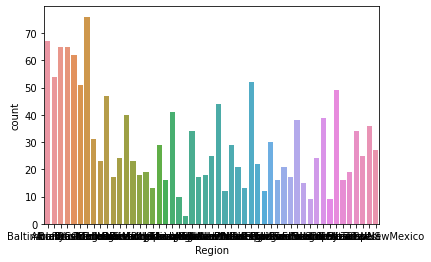

In [380]:
A=sns.countplot(x="Region",data=dvn)
print(dvn["Region"].value_counts())

We have a 51 state wise details in the dataset above

2015.0    1270
2016.0     247
Name: Year, dtype: int64


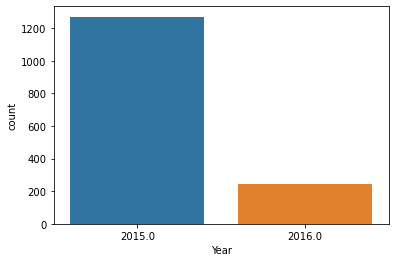

In [381]:
A=sns.countplot(x="Year",data=dvn)
print(dvn["Year"].value_counts())

Based on the year wise data - 2015 have a 1270 and 2016 have a 247 in the dataset.

# Checking the distribution of the continuous value of the float type columns

In [382]:
DVC=df[["PLU 4046","PLU 4225","PLU 4770","Small Bags","Large Bags","XLarge Bags"]].copy()

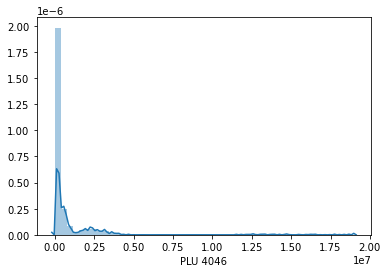

In [383]:
B=sns.distplot(df["PLU 4046"],kde=True)

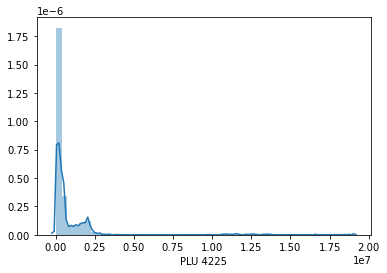

In [384]:
B=sns.distplot(df["PLU 4225"],kde=True)

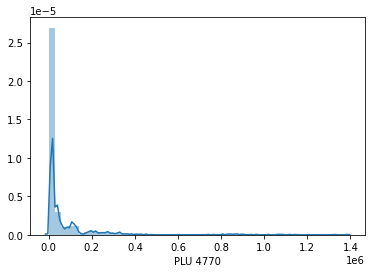

In [385]:
B=sns.distplot(df["PLU 4770"],kde=True)

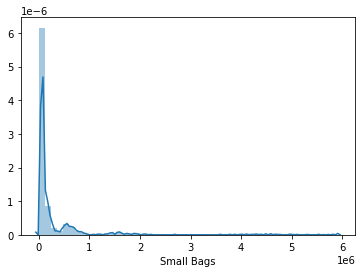

In [386]:
B=sns.distplot(df["Small Bags"],kde=True)

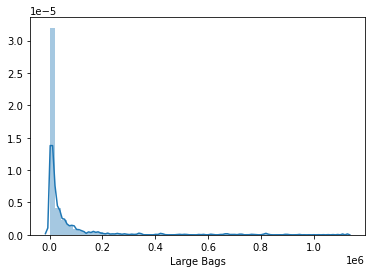

In [387]:
B=sns.distplot(df["Large Bags"],kde=True)

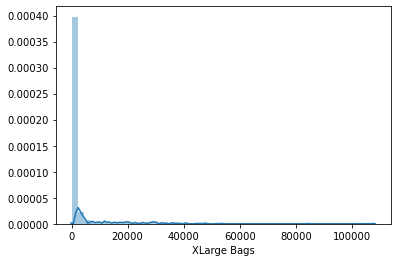

In [388]:
B=sns.distplot(df["XLarge Bags"],kde=True)

Visualization is completed. Since, we have a string value in the dataset. That will encode in next step

# Encoding the Dataframe:

In [389]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df.head()

,PLU 4046,PLU 4225,PLU 4770,Small Bags,Large Bags,XLarge Bags,Year,Region,AveragePrice
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,2015.0,0.0,1.33
1,674.28,44638.81,58.33,9408.07,97.49,0.0,2015.0,0.0,1.35
2,794.70,109149.67,130.50,8042.21,103.14,0.0,2015.0,0.0,0.93
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,2015.0,0.0,1.08
4,941.48,43838.39,75.78,5986.26,197.69,0.0,2015.0,0.0,1.28


We have encoded the string value in the dataset

# Describe Dataset

In [390]:
#Statistical Summary
df.describe()

,PLU 4046,PLU 4225,PLU 4770,Small Bags,Large Bags,XLarge Bags,Year,Region,AveragePrice
count,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,6.464387e+05,6.114375e+05,5.040550e+04,2.487736e+05,4.264205e+04,2181.771074,2015.162821,21.196440,1.074990
std,1.947614e+06,1.672906e+06,1.377812e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,16.132398,0.188891
min,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,0.000000e+00,0.000000,2015.000000,0.000000,0.490000
25%,2.040034e+04,4.147606e+04,9.112500e+02,2.972722e+04,5.407400e+02,0.000000,2015.000000,6.000000,0.980000
50%,8.175117e+04,1.186649e+05,7.688170e+03,6.237569e+04,5.044350e+03,0.000000,2015.000000,19.000000,1.080000
75%,3.775785e+05,4.851503e+05,2.916730e+04,1.461994e+05,2.926767e+04,401.480000,2015.000000,35.000000,1.190000
max,1.893304e+07,1.895648e+07,1.381516e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,50.000000,1.680000


We have a outlier and skewness in the columns in the dataset. So we will check in further step

# Correlation

In [391]:
df.corr()

,PLU 4046,PLU 4225,PLU 4770,Small Bags,Large Bags,XLarge Bags,Year,Region,AveragePrice
PLU 4046,1.000000,0.951952,0.898570,0.922278,0.884229,0.474063,-0.040439,0.269481,-0.190096
PLU 4225,0.951952,1.000000,0.927757,0.943988,0.900496,0.504718,-0.007254,0.215733,-0.092084
PLU 4770,0.898570,0.927757,1.000000,0.923607,0.840523,0.646053,0.029222,0.138092,-0.100567
Small Bags,0.922278,0.943988,0.923607,1.000000,0.879131,0.611300,0.106382,0.168650,-0.097682
Large Bags,0.884229,0.900496,0.840523,0.879131,1.000000,0.447779,-0.018678,0.297452,-0.177480
XLarge Bags,0.474063,0.504718,0.646053,0.611300,0.447779,1.000000,0.218342,-0.046144,-0.048284
Year,-0.040439,-0.007254,0.029222,0.106382,-0.018678,0.218342,1.000000,-0.470472,0.178683
Region,0.269481,0.215733,0.138092,0.168650,0.297452,-0.046144,-0.470472,1.000000,-0.229408
AveragePrice,-0.190096,-0.092084,-0.100567,-0.097682,-0.177480,-0.048284,0.178683,-0.229408,1.000000


We got the correlation result from the dataset. But It is difficult to understand the result Hence we are visualization this result through heatmap.

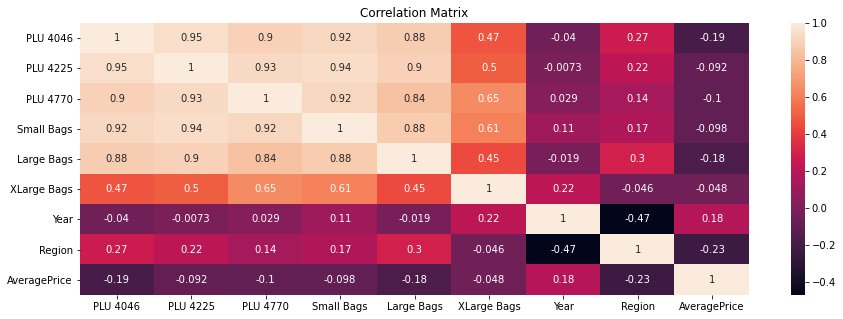

In [392]:
corr_mat=df.corr()
plt.figure(figsize=[15,5])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outcome of Correlation

We can see the positive and negative correlation with the target column. Hence, I have listed below on ascending order

Positive Sign:

1)Only year columns have a positive(18%) with target column.

Negative Sign:

1)Feature columns have major are having negative relationship with target column which are PLU 4046,PLU 4225,PLU 4770,Small Bags,Large Bags,XLarge Bags,Region.

# Outlier Checking 

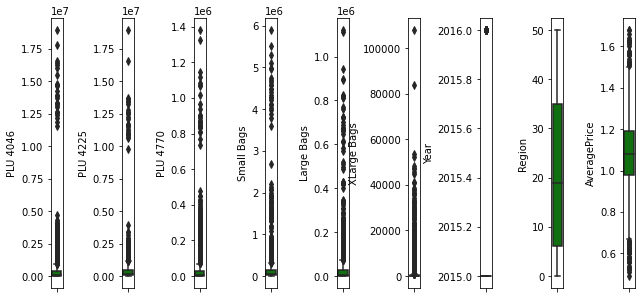

In [393]:
collist=df.columns.values
ncol=12
nrow=6
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In the above - we have a outlier in most of the columns which are PLU 4046,PLU 4225,PLU 4770,Small Bags,Large Bags,XLarge Bags,Region.

# Checking Skewness

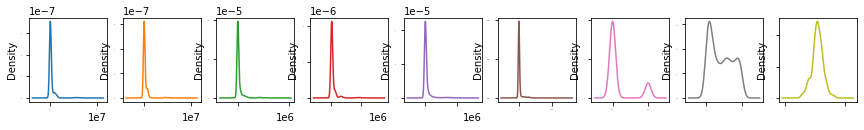

In [395]:
df.plot(kind='density',subplots=True,layout=(12,21),sharex=False,legend=False,fontsize=1,figsize=(35,22))
plt.show()

In [396]:
df.skew()

PLU 4046        6.051830
PLU 4225        6.394926
PLU 4770        5.405164
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
Year            1.828332
Region          0.288146
AveragePrice   -0.109444
dtype: float64

From the above info - we can see the skewness in the dataset. So, We will rectify this in upcoming step.

Also, We can consider the -/+.5 is standard

# Data Cleaning

# Removing Outlier

In [397]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(z.shape)
threshold=3
print(np.where(z>3))

(1517, 9)
(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183, 1184, 1184,
       1184, 1184, 1184, 1184, 1185, 1185, 1185, 1185, 1185, 1186, 1186,
       1186, 1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1188, 1188,
       1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189, 1189, 1190, 1190,
       1190, 1190, 1190, 1190, 1191, 1191, 1191, 1191, 1191, 1191, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1194, 1194,
       1194, 1194, 1194, 1195, 1195, 1195, 1195, 1195, 1195, 1196, 1196,
       1196, 1196, 1196, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198,
       1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1200, 1200, 1200,
       1200, 1200, 1201, 1201, 1201, 1201, 1201, 1202, 1202, 1202, 1202,
       1202, 1202, 1203, 1203, 1203, 1203, 1203, 1204, 1204, 1204, 1204,
       1204, 1205, 1205, 1205, 1205, 1205, 1206, 1206, 1206, 1206, 1206,
       1207, 1208, 1209, 1210, 1212, 121

In [398]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1517, 9)
(1436, 9)


We have applied ZSCORE technic for removing outlier in the dataset.

In [399]:
Loss_percentage=(1517-1436)/1517*100
print(Loss_percentage)

5.339485827290705


After removing the outlier - we have only 5% dataloss. So it is good to go with this data.

In [400]:
X=df_new.iloc[:,:-1]
Y=df_new.iloc[:,-1]

I have created the feature and target columns. It will help me to do trian & test for preparing model

# Data Transform for Remove Skewness

In [401]:
from sklearn.preprocessing import power_transform
DF=power_transform(X,method='yeo-johnson')
DF=pd.DataFrame(DF,columns=X.columns)

In [402]:
DF.skew()

PLU 4046      -0.025799
PLU 4225       0.000835
PLU 4770      -0.054751
Small Bags     0.013734
Large Bags    -0.118018
XLarge Bags    0.479994
Year           2.004439
Region        -0.219708
dtype: float64

We have removed the skewness from the dadaset. Let use this for model preparation.

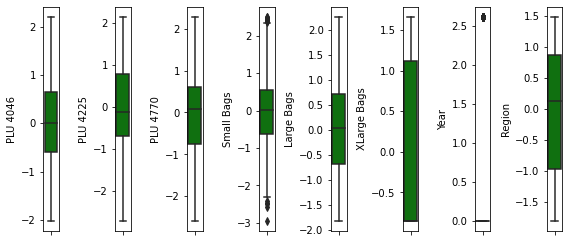

In [403]:
collist=DF.columns.values
ncol=25
nrow=15
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(DF[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Finding the best model and Random State

In [404]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(DF)

In [416]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range (0,500):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.25,random_state=i)
    LR =LinearRegression()
    LR.fit(x_train,Y_train)
    PX1=LR.predict(x_train)
    PY1=LR.predict(x_test)
    R2 = r2_score(Y_test, PY1)
    if R2>maxAccu:
        maxAccu=R2
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 42.38348631716147 on Random state 201


In [420]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range (0,500):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.25,random_state=i)
    RR =Ridge()
    RR.fit(x_train,Y_train)
    PX2=RR.predict(x_train)
    PY2=RR.predict(x_test)
    R2 = r2_score(Y_test,PY2)
    if R2>maxAccu:
        maxAccu=R2
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 42.35184391503649 on Random state 201


Best Accuracy score got from the model which are below i have listed:

1) LinearRegression score is - 42%  
3) Ridge score is - 42%  

Based on the above score - Ridge have the high score which is 42%. However, we will check with cross validation score then finalize the model.

# Creating the Train_Test_Split

In [421]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.25,random_state=201)

# Cross-Validation of the Model

In [422]:
from sklearn.model_selection import cross_val_score
cv1_score=cross_val_score(LR,x,Y,cv=3)
cv2_score=cross_val_score(RR,x,Y,cv=3)
cv1_mean=cv1_score.mean()
cv2_mean=cv2_score.mean()
print(f"Cross Validation Score of is :",cv1_mean*100)
print(f"Cross Validation Score of is :",cv2_mean*100)

Cross Validation Score of is : 10.323386548323203
Cross Validation Score of is : 9.855491124165523


We have a cross validation score which will help us to choose the model.

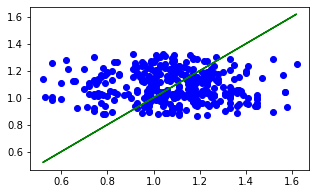

In [423]:
plt.figure(figsize=(5,3))
plt.scatter(x=Y_test,y=PY1,color='b')
plt.plot(Y_test,Y_test,color='g')
plt.show()

# Regularization

In [426]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10, 100],'random_state':list(range(0,100))}
clf=GridSearchCV(RR,parameters)
clf.fit(x_train,Y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [427]:
RR=Ridge(alpha=10,random_state=0)
RR.fit(x_train,Y_train)
RR.score(x_train,Y_train)
predict=RR.predict(x_test)
ls=r2_score(Y_test,predict)
print("Lasso Score :",ls*100)

cv_score=cross_val_score(RR,x,Y,cv=3)
cv_mean=cv_score.mean()
print("CV Score :",cv_mean*100)

Lasso Score : 42.06969148099778
CV Score : 11.817444798729818


# Ensemblie Technique

In [428]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
RF=RandomForestRegressor()
clf=GridSearchCV(RF,parameters)
clf.fit(x_train,Y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [429]:
RF=RandomForestRegressor(criterion="mse",max_features="log2")
RF.fit(x_train,Y_train)
RF.score(x_train,Y_train)
pred=RF.predict(x_test)
RFS=r2_score(Y_test,pred)
print("R2 Score :",RFS*100)

rfs=cross_val_score(RF,x,Y,cv=3)
rfc=rfs.mean()
print("CV Score :",rfc*100)

R2 Score : 84.02747566947124
CV Score : 24.4011431721894


# Model Saving

In [430]:
import pickle
filename='Avacado_Project.pkl'
pickle.dump(RF,open(filename,'wb'))

# Conclusion

In [431]:
Loaded_load = pickle.load(open('Avacado_Project.pkl','rb'))
Result=Loaded_load.score(x_test,Y_test)
print(Result)

0.8402747566947124


In [432]:
Conclusion=pd.DataFrame([Loaded_load.predict(x_test)[:],pred[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,349,350,351,352,353,354,355,356,357,358
Predicted,1.1683,0.8019,1.0599,1.1518,1.351,1.0968,0.7647,0.7699,1.2244,1.0964,...,0.7099,1.1194,1.0449,1.2218,1.1181,0.7513,0.7516,0.7788,1.0774,1.192
Original,1.1683,0.8019,1.0599,1.1518,1.351,1.0968,0.7647,0.7699,1.2244,1.0964,...,0.7099,1.1194,1.0449,1.2218,1.1181,0.7513,0.7516,0.7788,1.0774,1.192


Output from the model - The Prediction is seems like very accurate. So the model is performing very well